<a href="https://colab.research.google.com/github/HemaKumar0077/Autism-Detection-by-image/blob/main/Autism_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install Dependencies and Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
import tensorflow as tf
import os as os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2. Remove Unwanted images

In [75]:
import cv2


In [6]:
!pip install opencv-python


In [77]:
data_dir = "C:/Retinal-image-analysis/Retinal Fundus Images_medium"

In [79]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [183]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [81]:
os.listdir(data_dir)

['1.Dry AMD',
 '10.Glaucoma',
 '11.Normal Fundus',
 '2.Wet AMD',
 '3.Mild DR',
 '4.Moderate DR',
 '5.Severe DR',
 '6.Proliferate DR',
 '7.Cataract',
 '8.Hypertensive Retinopathy',
 '9.Pathological Myopia']

# 3. Load **Data**

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [84]:
data = tf.keras.utils.image_dataset_from_directory("C:/Retinal-image-analysis/Retinal Fundus Images_medium")

Found 10565 files belonging to 11 classes.


In [86]:
data_iterator = data.as_numpy_iterator()

In [88]:
batch = data_iterator.next()

In [90]:
batch[0].shape

(32, 256, 256, 3)

In [92]:
#batch[1]

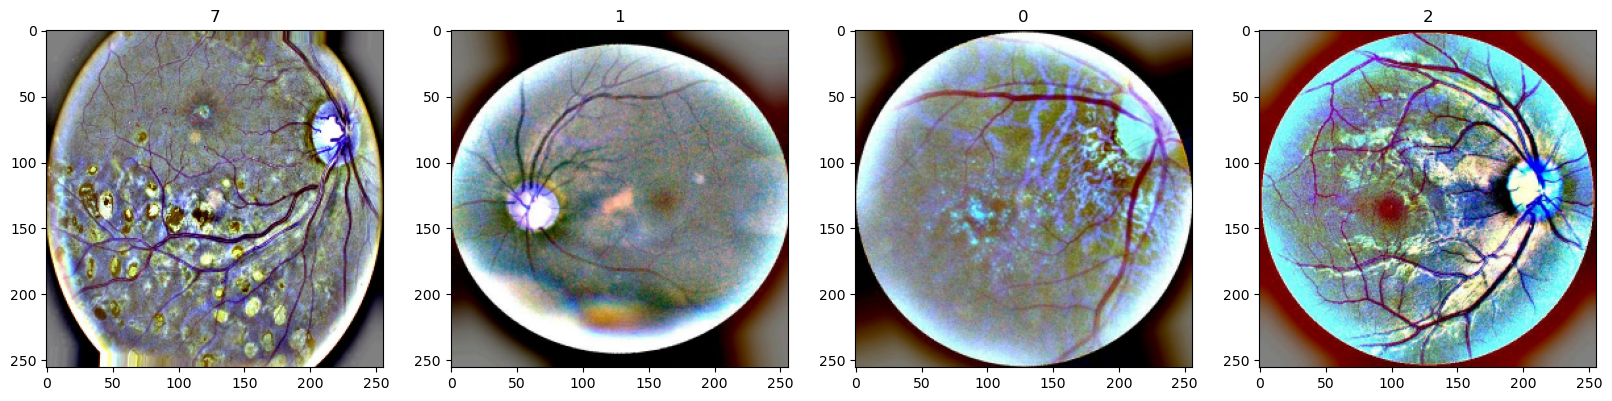

In [94]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4. Scale Data

In [97]:
data = data.map(lambda x,y: (x/255, y))

In [99]:
data.as_numpy_iterator().next()

(array([[[[0.48431373, 0.46862745, 0.45686275],
          [0.48431373, 0.46862745, 0.45686275],
          [0.48431373, 0.46862745, 0.45686275],
          ...,
          [0.49019608, 0.4745098 , 0.47058824],
          [0.49803922, 0.4745098 , 0.48235294],
          [0.5       , 0.4764706 , 0.48431373]],
 
         [[0.4764706 , 0.46078432, 0.4490196 ],
          [0.4764706 , 0.46078432, 0.4490196 ],
          [0.4764706 , 0.46078432, 0.4490196 ],
          ...,
          [0.49019608, 0.4745098 , 0.47058824],
          [0.49803922, 0.4745098 , 0.48235294],
          [0.5       , 0.4764706 , 0.48431373]],
 
         [[0.47058824, 0.45490196, 0.44313726],
          [0.47058824, 0.45490196, 0.44313726],
          [0.47058824, 0.45490196, 0.44313726],
          ...,
          [0.48235294, 0.47843137, 0.47058824],
          [0.49411765, 0.47843137, 0.48235294],
          [0.49607843, 0.48039216, 0.48431373]],
 
         ...,
 
         [[0.46666667, 0.47058824, 0.44705883],
          [0.46470

In [101]:
batch[0].max()

255.0

In [103]:
len(data)

331

5. Split Data

In [106]:
train_size = int(len(data)*.75)+1
val_size = int(len(data)*.25)
# test_size = int(len(data)*.1)

In [108]:
train_size+val_size+test_size

342

In [110]:
train_size

249

In [112]:
val_size

82

In [114]:
test_size

11

In [116]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#6. Build Deep Learning Model

In [119]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(11, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

C:\Users\hemur\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 127, 127, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,700,475 (14.12 MB)

 Trainable params: 3,699,835 (14.11 MB)

 Non-trainable params: 640 (2.50 KB)

7. Train

In [126]:
logdir='logs'

In [128]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [130]:
history = model.fit(
    train, 
    epochs=50,
    validation_data=val,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 101s 382ms/step - accuracy: 0.4342 - loss: 1.6512 - val_accuracy: 0.1841 - val_loss: 3.0261 - learning_rate: 0.0010
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 97s 389ms/step - accuracy: 0.6124 - loss: 0.9902 - val_accuracy: 0.6122 - val_loss: 0.9347 - learning_rate: 0.0010
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 98s 392ms/step - accuracy: 0.7018 - loss: 0.7671 - val_accuracy: 0.5710 - val_loss: 1.1451 - learning_rate: 0.0010
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 98s 392ms/step - accuracy: 0.7559 - loss: 0.6419 - val_accuracy: 0.6142 - val_loss: 0.9827 - learning_rate: 0.0010
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 97s 390ms/step - accuracy: 0.7785 - loss: 0.5799 - val_accuracy: 0.6388 - val_loss: 0.8437 - learning_rate: 0.0010
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 99s 395ms/step - accuracy: 0.8336 - loss: 0.4302 - val_accuracy: 0.3131 - val_loss: 4.8953 - learning_rate: 0.0010
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 98s 391ms/step - accuracy: 0.

8. Plot Performance

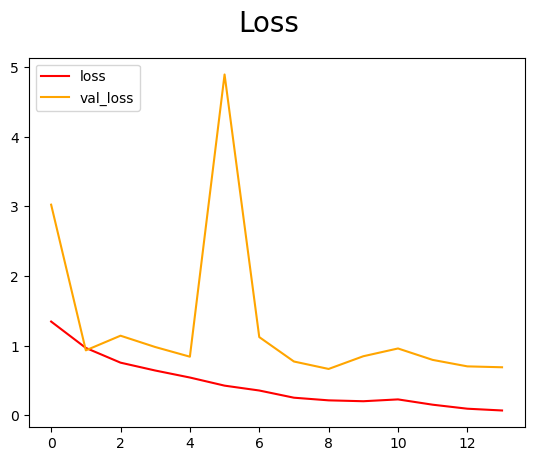

In [133]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

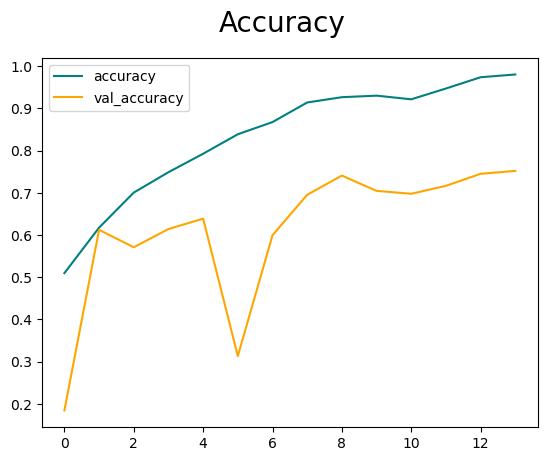

In [135]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [137]:
tf.keras.models.save_model(model,'my_model22.hdf5')

In [243]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

Found 1236 images belonging to 11 classes.


C:\Users\hemur\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 505ms/step
Classification Report:

                            precision    recall  f1-score   support

                 1.Dry AMD       0.61      0.63      0.62        54
                 2.Wet AMD       0.78      0.47      0.59       156
                 3.Mild DR       0.89      0.99      0.93       179
             4.Moderate DR       0.53      0.35      0.42        23
               5.Severe DR       0.37      0.88      0.52       102
          6.Proliferate DR       0.81      0.35      0.49       216
                7.Cataract       0.59      0.54      0.56       107
8.Hypertensive Retinopathy       0.55      0.55      0.55        91
     9.Pathological Myopia       0.68      0.95      0.79       112
               10.Glaucoma       0.66      0.68      0.67        94
          11.Normal Fundus       0.89      0.80      0.85       102

                  accuracy                           0.66      1236
                 macro avg       0.67      0.65 

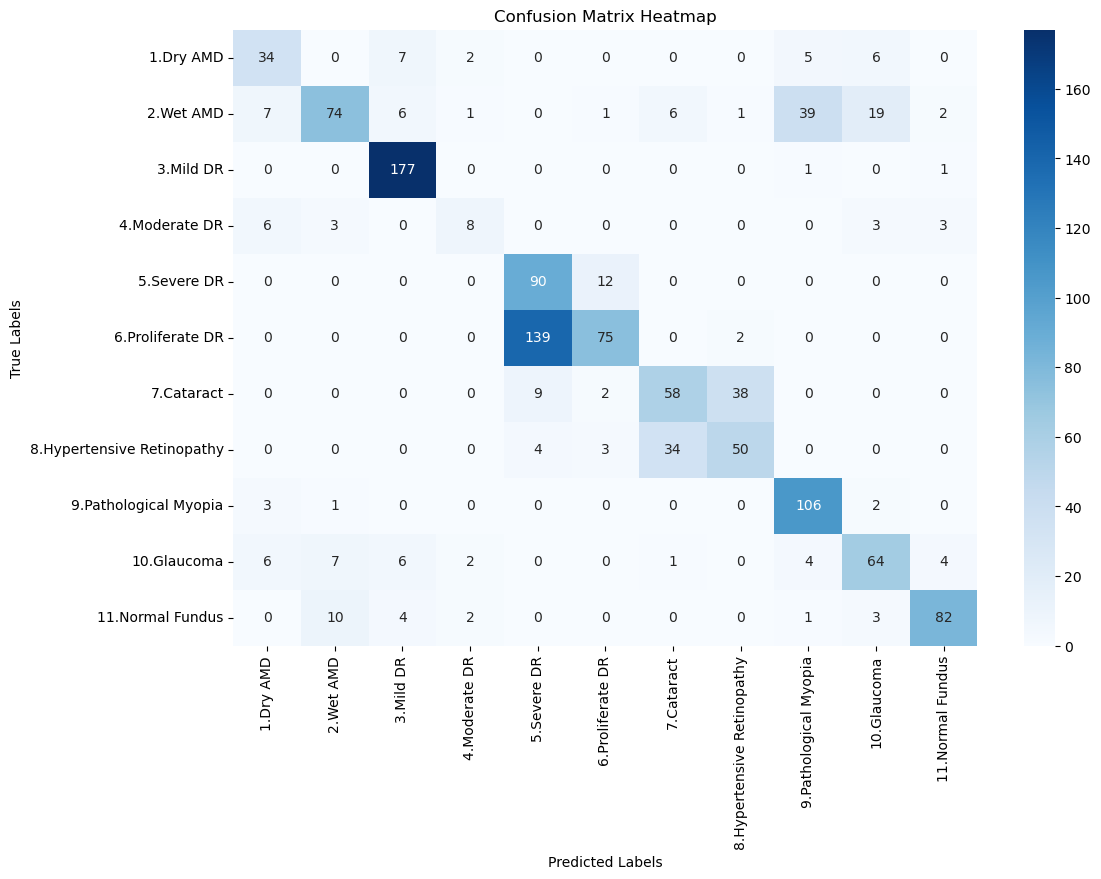

In [139]:
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Load the saved model
model = load_model('my_model22.hdf5')

# Define class labels
class_labels = [
    '1.Dry AMD', '2.Wet AMD', '3.Mild DR', '4.Moderate DR', '5.Severe DR',
    '6.Proliferate DR', '7.Cataract', '8.Hypertensive Retinopathy',
    '9.Pathological Myopia', '10.Glaucoma', '11.Normal Fundus'
]

# Path to the testing dataset directory
test_data_dir = "C:/Retinal-image-analysis/Retinal Fundus Images/test"

# Preprocessing for the testing dataset
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(256, 256),  # Adjust to match your model's input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure order is consistent for evaluation
)

# Predict on the testing dataset
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Compute the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:\n")
print(conf_matrix)

# Save confusion matrix as a heatmap (Optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
